In [1]:
# Description: The program uses an artificial recurrent neural network called long short term memory LSTM to predict the closing stock price of a corportation (Apple Inc.) using the past 60 day stock price.

In [2]:
#import lib
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# because of mess with tensorflow2 and tensorflow has no attribute get_default_graph
# from keras.models import Sequential 
# from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2012-01-01',end='2020-03-09')
#
print("{}".format(df))

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2012-01-03  14.732143  14.607143  14.621429  14.686786  302220800.0  12.650659
2012-01-04  14.810000  14.617143  14.642857  14.765714  260022000.0  12.718646
2012-01-05  14.948214  14.738214  14.819643  14.929643  271269600.0  12.859850
2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0  12.994284
2012-01-09  15.276786  15.048214  15.196429  15.061786  394024400.0  12.973674
...               ...        ...        ...        ...          ...        ...
2020-03-03  76.000000  71.449997  75.917503  72.330002  319475600.0  71.773636
2020-03-04  75.849998  73.282501  74.110001  75.684998  219178400.0  75.102829
2020-03-05  74.887497  72.852501  73.879997  73.230003  187572800.0  72.666725
2020-03-06  72.705002  70.307503  70.500000  72.257500  226176800.0  71.701706
2020-03-09  69.522499  65.750000  65.937500  66.5425

Text(0, 0.5, 'Close Price USD ($)')

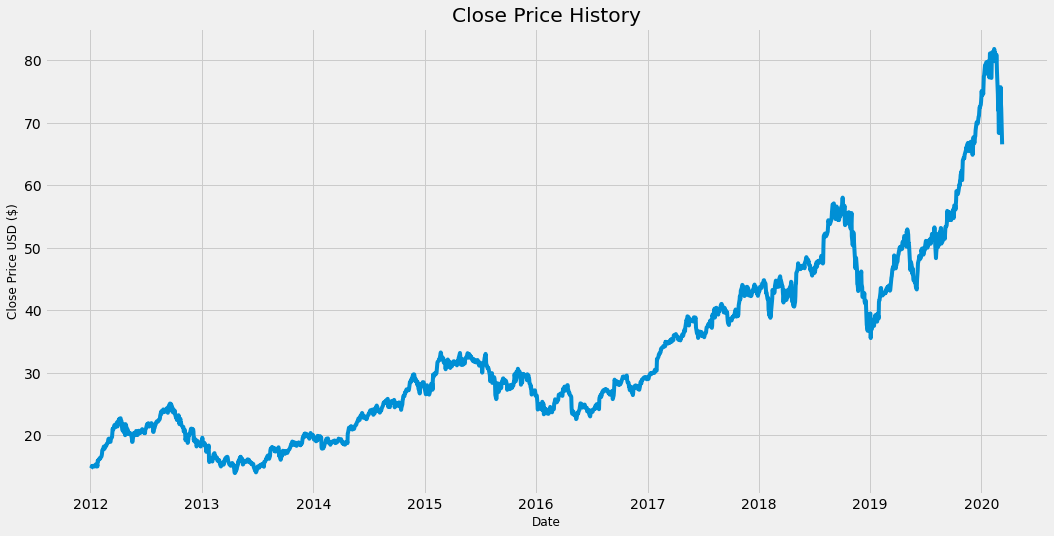

In [4]:
#Get the number of rows and columns in the data set
df.shape
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price USD ($)", fontsize=12)


In [5]:
#Create a new dataframe with only the Close column
data = df.filter(['Close'])
#conver the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) *.8)
training_data_len

1647

In [9]:
#Scale the data -> preprocessing normalization etc.
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)
print("Scalar data #\n{}".format(scaled_data))
#Create the training data set
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train dataset
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61:
        print("{} {}\n".format(x_train,y_train))

Scalar data #
[[0.01089548]
 [0.01205871]
 [0.01447467]
 ...
 [0.87369663]
 [0.85936402]
 [0.77513726]]
[array([0.01089548, 0.01205871, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541157, 0.01798544,
       0.02030665, 0.01959081, 0.01566948, 0.01941185, 0.01572739,
       0.02954412, 0.02847564, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639334, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995808,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972125, 0.08139505, 0.08499003, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339198, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])] [0.11544472908538655]

[array([0.01089548, 0.01205871, 0.01447467, 0.01677483, 0.01642217

In [10]:
#Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
#Reshape the data because model expect 3 dimanation data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1587, 60, 1)

In [11]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
print("model # {}".format(model))

model # <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000014B0CA52488>


In [12]:
#Compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#train model
model.fit(x_train,y_train,batch_size=1,epochs=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1587/1587 [==============================] - 27s 17ms/step - loss: 4.5741e-04


In [15]:
#Crewat the testing data set
#Create a new array containing 
test_data = scaled_data[training_data_len - 60:, :]
print("test data # {}".format(test_data))
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]